In [21]:
# assignement 1_1
# numbers  = []
with open('input_1_1.txt', 'r') as f:
    numbers = f.readlines()

In [22]:
import numpy as np
numbers = np.array([int(number) for number in numbers])

In [23]:
increased = numbers[1:] > numbers[:-1]

In [24]:
sum(increased)


1466

In [25]:
window_scores = numbers[:-2] + numbers[1:-1] + numbers[2:]
increased = window_scores[1:] > window_scores[:-1]

In [26]:
sum(increased)

1491

In [1]:
# assignment 2_1

In [4]:
with open('input_2_1.txt', 'r') as f:
    strings = f.readlines()

In [5]:
commands = [string.split() for string in strings]


In [12]:
hor = 0
depth = 0
aim = 0
for direction, amount in commands:
    if direction == 'forward':
        hor += int(amount)
        depth += aim * int(amount)
    elif direction == 'down':
        aim += int(amount)
    elif direction == 'up':
        aim -= int(amount)
    else:
        raise ValueError(direction + amount)

In [13]:
depth * hor


1759818555

In [52]:
# assignement 3_1
with open('input_3_1.txt', 'r') as f:
    strings = f.readlines()
ls = [[*string.strip()] for string in strings]

In [38]:
out_most = ''
out_least = ''
from collections import Counter
for vals in zip(*ls):
    count = Counter(vals)
    out_most += max(count, key=count.get)
    out_least += min(count, key=count.get)


int(out_most, 2) * int(out_least, 2)


198

In [53]:
# assignment 3_2
# first do most
ls2 = [string.strip() for string in strings]
pattern = ''
for i in range(len(ls2[0])):
    vals = [string[i] for string in strings if string[:i] == pattern]
    print(len(vals))
    if len(vals) == 1:
        break
    count = Counter(vals)
    print(count)
    if count['1'] == count['0']:
        pattern += '1'
        if count['1'] == 1:
            i += 1
            break
    else:
        pattern += max(count, key=count.get)

print(pattern)
out_most = [string for string in strings if string[:i] == pattern][0]

1000
Counter({'1': 501, '0': 499})
501
Counter({'1': 257, '0': 244})
257
Counter({'0': 131, '1': 126})
131
Counter({'0': 69, '1': 62})
69
Counter({'0': 40, '1': 29})
40
Counter({'0': 21, '1': 19})
21
Counter({'0': 14, '1': 7})
14
Counter({'0': 7, '1': 7})
7
Counter({'0': 4, '1': 3})
4
Counter({'0': 3, '1': 1})
3
Counter({'0': 2, '1': 1})
2
Counter({'1': 1, '0': 1})
110000010001


In [54]:
pattern = ''
for i in range(len(ls2[0])):
    vals = [string[i] for string in strings if string[:i] == pattern]
    print(len(vals))
    if len(vals) == 1:
        break
    count = Counter(vals)
    print(count)
    if count['1'] == count['0']:
        pattern += '0'
        if count['1'] == 1:
            i += 1
            break
    else:
        pattern += min(count, key=count.get)

out_least = [string for string in strings if string[:i] == pattern][0]


1000
Counter({'1': 501, '0': 499})
499
Counter({'1': 250, '0': 249})
249
Counter({'1': 133, '0': 116})
116
Counter({'0': 59, '1': 57})
57
Counter({'1': 30, '0': 27})
27
Counter({'1': 16, '0': 11})
11
Counter({'1': 6, '0': 5})
5
Counter({'1': 3, '0': 2})
2
Counter({'1': 1, '0': 1})


In [55]:
int(out_most, 2) * int(out_least, 2)


793873

In [29]:
import numpy as np
import re

In [46]:
with open('input4.txt', 'r') as f:
    inputs = f.readlines()


In [47]:
drawn_numbers = [int(val) for val in inputs[0].strip().split(',')]

In [48]:
# get boards
(len(inputs) - 1) / 6

100.0

In [49]:
boards = [[[int(val) for val in inputs[j].strip().split(' ') if val != ''] for j in range((i * 6) + 2, (i*6) + 7)] for i in range(100)]

In [50]:
boards = [np.array(board) for board in boards]



In [51]:
masks = [board == -1 for board in boards]
flag = False
for input in drawn_numbers:
    for board, mask in zip(boards, masks):
        mask += (board == input)
        if any(np.sum(mask, axis=0) == 5) or any(np.sum(mask, axis=1) == 5):
            print(board)
            print(mask)
            print(drawn_numbers)
            print(np.sum(board[~mask]) * input)
            flag = True
    if flag:
        break



[[90 39 48 75 52]
 [78  7 27  8 86]
 [ 2 69 80 98 66]
 [22 77 11 94 47]
 [93 19 53 34 71]]
[[False  True False  True  True]
 [False False  True  True False]
 [ True False False  True False]
 [False False False  True False]
 [ True False False  True False]]
[93, 18, 74, 26, 98, 52, 94, 23, 15, 2, 34, 75, 13, 31, 39, 76, 96, 16, 84, 12, 38, 27, 8, 85, 86, 43, 4, 79, 57, 19, 40, 59, 14, 21, 35, 0, 90, 11, 32, 17, 78, 83, 54, 42, 66, 82, 99, 45, 55, 63, 24, 5, 89, 46, 80, 49, 3, 48, 67, 47, 50, 60, 81, 51, 71, 33, 72, 6, 9, 30, 56, 20, 77, 29, 28, 69, 25, 36, 91, 92, 65, 22, 62, 58, 64, 88, 10, 7, 87, 41, 44, 37, 73, 70, 68, 97, 61, 95, 53, 1]
6592


In [52]:
masks = [board == -1 for board in boards]
flag = False
round_finished = [-1 for board in boards]
for round, input in enumerate(drawn_numbers):
    for i, (board, mask) in enumerate(zip(boards, masks)):
        if round_finished[i] == -1:
            mask += (board == input)
            if any(np.sum(mask, axis=0) == 5) or any(np.sum(mask, axis=1) == 5):
                round_finished[i] = round


last_finished_boad = max(enumerate(round_finished), key=lambda x: x[1])[0]
print(np.sum(boards[last_finished_boad][~masks[last_finished_boad]]) * drawn_numbers[round_finished[last_finished_boad]])


31755


In [53]:
last_finished_boad

39

In [41]:
round_finished

[13, 14, 11]

In [44]:
drawn_numbers[last_finished_boad + 1]

9

In [90]:
# assignement 5_1
import numpy as np
import re
import matplotlib.pyplot as plt
with open('input5.txt', 'r') as f:
    inputs = f.readlines()

In [91]:
# convert to list of four numbers
lines = [list(map(int, re.split('->|,', input))) for input in inputs]

In [92]:
# find grid size
max(max(line) for line in lines)


989

In [51]:
# split in horizontal and vertical lines
horizontal_lines = []
vertical_lines = []
for line in lines:
    if line[0] == line[2]:
        horizontal_lines.append(line)
    elif line[1] == line[3]:
        vertical_lines.append(line)
    else:
        pass

In [53]:
grid = np.zeros((1000, 1000))
count = 0
for line in horizontal_lines:
    x = line[0]
    y1 = min(line[1], line[3])
    y2 = max(line[1], line[3]) + 1
    grid[x, y1:y2] += 1

for line in vertical_lines:
    y = line[1]
    x1 = min(line[0], line[2])
    x2 = max(line[0], line[2]) + 1
    grid[x1:x2, y] += 1

In [45]:
np.sum(grid)


7.0

In [54]:
len(np.argwhere(grid > 1))

7085

In [93]:
# assignment 5_2
def line_to_coords(line):
    print(line)
    length = max(abs(line[2] - line[0]), abs(line[3] - line[1])) + 1
    print(length)
    x_mul = np.sign(line[2] - line[0])
    y_mul = np.sign(line[3] - line[1])
    print(x_mul, y_mul)
    ls = []
    for i in range(length):
        ls.append((line[0] + i * x_mul, line[1] + i * y_mul))
    return ls

In [94]:
coords = list(map(line_to_coords, lines))


[194, 556, 739, 556]
546
1 0
[818, 920, 818, 524]
397
0 -1
[340, 734, 774, 300]
435
1 -1
[223, 511, 146, 434]
78
-1 -1
[841, 47, 122, 766]
720
-1 1
[323, 858, 859, 322]
537
1 -1
[277, 205, 85, 205]
193
-1 0
[782, 901, 782, 186]
716
0 -1
[969, 96, 969, 648]
553
0 1
[504, 971, 989, 971]
486
1 0
[926, 151, 926, 480]
330
0 1
[722, 895, 722, 488]
408
0 -1
[15, 14, 987, 986]
973
1 1
[378, 486, 267, 597]
112
-1 1
[732, 418, 157, 418]
576
-1 0
[252, 515, 257, 520]
6
1 1
[61, 828, 659, 230]
599
1 -1
[116, 652, 893, 652]
778
1 0
[827, 196, 827, 564]
369
0 1
[677, 515, 677, 257]
259
0 -1
[380, 897, 132, 897]
249
-1 0
[812, 959, 812, 23]
937
0 -1
[989, 382, 294, 382]
696
-1 0
[973, 89, 81, 981]
893
-1 1
[292, 920, 987, 225]
696
1 -1
[441, 394, 441, 469]
76
0 1
[502, 662, 502, 213]
450
0 -1
[609, 570, 609, 58]
513
0 -1
[559, 47, 208, 47]
352
-1 0
[77, 192, 277, 192]
201
1 0
[229, 588, 66, 588]
164
-1 0
[705, 363, 705, 161]
203
0 -1
[944, 51, 78, 917]
867
-1 1
[699, 889, 699, 354]
536
0 -1
[90, 48, 

<ipython-input-95-e34c733da704>:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  grid[list(zip(*coord_ls))] += 1


20271

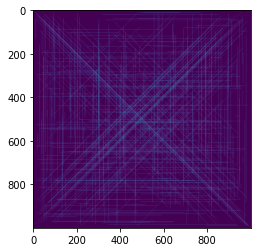

In [95]:
grid = np.zeros((1000, 1000))
for coord_ls in coords:
    grid[list(zip(*coord_ls))] += 1
plt.imshow(grid)
len(np.argwhere(grid > 1))

In [25]:
import numpy as np
with open('input6.txt', 'r') as f:
    inputs = f.readlines()

In [26]:
start_days = [int(val) for val in inputs[0].split(',')]

In [27]:

start_amounts = Counter(start_days)

state0 = np.zeros(9)
for val, count in start_amounts.items():
    state0[val] = count

print(state0)
transition = [(i - 1, i ) for i in range(1, 9)] + [(6, 0), (8, 0)]
transition_matrix = np.zeros((9, 9))
transition_matrix[list(zip(*transition))] = 1
transition_matrix

[  0. 119.  45.  48.  40.  48.   0.   0.   0.]


<ipython-input-27-dfea133df8d3>:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  transition_matrix[list(zip(*transition))] = 1


array([[0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [28]:
state = transition_matrix.dot(state0)
state

array([119.,  45.,  48.,  40.,  48.,   0.,   0.,   0.,   0.])

In [21]:
state = transition_matrix.dot(state)
state


array([2., 1., 0., 0., 0., 1., 1., 1., 1.])

In [30]:
from itertools import count
state = state0
for i in range(256):
    state = transition_matrix.dot(state)
print(np.sum(state))


1640526601595.0


In [50]:
with open('input7.txt', 'r') as f:
    inputs = f.readlines()

positions = list(map(int, inputs[0].split(',')))

In [51]:
import numpy as np


In [52]:
x = int(np.median(positions))

In [53]:
np.sum([abs(x - val) for val in positions])


339321

In [54]:
x2 = int(np.mean(positions))

In [55]:
def energy(goal, pos):
    diff = abs(goal - pos)
    return diff * (diff + 1) / 2

@lru_cache()
def total_energy(goal, positions):
    return np.sum(energy(goal, pos) for pos in positions)

In [56]:
from functools import lru_cache

@lru_cache()
def min_step(val, positions, func):
    base_line = func(val, positions)
    if func(val - 1, positions) < base_line:
        return min_step(val - 1, positions, func)
    if func(val + 1, positions) < base_line:
        return min_step(val + 1, positions, func)
    return val, base_line

In [57]:
pos, fuel = min_step(int(np.mean(positions)), tuple(positions), total_energy)

<ipython-input-55-1f1eb68b19bd>:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(energy(goal, pos) for pos in positions)


In [58]:
fuel

95476244.0

In [1]:
# assignment 8 part 1
with open('input8.txt', 'r') as f:
    strings = f.readlines()

# code_lists = [[len(code) for code in line.split('|')[-1].strip().split(' ')] for line in strings]

# codes_lens = [l for line in code_lists for l in line]

In [84]:
from collections import Counter
c = Counter(codes_lens)
c[2] + c[3] + c[4] + c[7]

301

8

In [9]:
def decode_list(ls):
    out = {}
    val1 = ''
    val4 = ''
    len5s = []
    len6s = []
    for val in ls:
        if len(val) == 2:
            out[val] = 1
            val1 = val
        elif len(val) == 3:
            out[val] = 7
        elif len(val) == 4:
            out[val] = 4
            val4 = val
        elif len(val) == 7:
            out[val] = 8
        elif len(val) == 5:
            len5s.append(val)
        elif len(val) == 6:
            len6s.append(val)
        else:
            raise ValueError(f'no good len for {val}')
    for val in len5s:
        if len(set(val) & set(val1)) == 2:
            out[val] = 3
        elif len(set(val) & set(val4)) == 2:
            out[val] = 2
        elif len(set(val) & set(val4)) == 3:
            out[val] = 5
        else:
            raise ValueError(f'{val} has length 5 but no case')
    for val in len6s:
        if len(set(val) & set(val1)) == 1:
            out[val] = 6
        elif len(set(val) & set(val4)) == 3:
            out[val] = 0
        elif len(set(val) & set(val4)) == 4:
            out[val] = 9
        else:
            raise ValueError(f'{val} has length 6 but no case')
    return {sort_string(key): val for key, val in out.items()}



In [10]:
encodings = [[code for code in line.split('|')[0].strip().split(' ')] for line in strings]
codes = [[code for code in line.split('|')[1].strip().split(' ')] for line in strings]

In [11]:
decodings = [decode_list(line) for line in encodings]

In [12]:
values = [int(''.join([str(decoding[sort_string(c)]) for c in code])) for decoding, code in zip(decodings, codes)]
sum(values)


908067

In [6]:
def sort_string(s):
    val = ''.join(sorted(s))
    return val

In [90]:
len(strings)


200

In [80]:
values


[7699,
 3598,
 4859,
 6631,
 6195,
 9571,
 9529,
 9925,
 4852,
 1984,
 3324,
 2893,
 5632,
 1533,
 9199,
 8246,
 5961,
 5597,
 7412,
 9273,
 9119,
 6319,
 1942,
 3347,
 7182,
 1986,
 3968,
 8625,
 4895,
 7739,
 5779,
 1169,
 2881,
 5839,
 1299,
 4714,
 3394,
 1143,
 1235,
 1759,
 1339,
 3792,
 6667,
 3184,
 9726,
 7621,
 1552,
 3173,
 9456,
 2326,
 9796,
 4646,
 3748,
 5998,
 2693,
 9595,
 9176,
 1924,
 8651,
 9375,
 4431,
 1946,
 5549,
 7274,
 8894,
 2982,
 9225,
 8986,
 4676,
 8947,
 2622,
 3927,
 4992,
 8197,
 6183,
 9651,
 4576,
 8652,
 6879,
 4249,
 6388,
 9996,
 9155,
 9929,
 1256,
 3889,
 9423,
 5785,
 5388,
 7725,
 3556,
 2685,
 6575,
 6985,
 2973,
 2299,
 3349,
 5193,
 5944,
 1977,
 9241,
 9966,
 1584,
 3972,
 5277,
 2542,
 2339,
 8242,
 1324,
 7489,
 9593,
 3359,
 9112,
 8558,
 6435,
 3145,
 9995,
 9496,
 5273,
 9579,
 9387,
 9925,
 7569,
 2947,
 3571,
 7114,
 2838,
 7674,
 5898,
 1741,
 4253,
 7696,
 4128,
 7936,
 2363,
 9418,
 9862,
 9624,
 4354,
 5472,
 3917,
 2428,
 4619,

In [140]:
# assignment 9
# load data
with open('input9.txt', 'r') as f:
    strings = f.readlines()

In [141]:
import numpy as np
# make numpy array from
height_map = np.array([list(map(int, string.strip())) for string in strings])


In [142]:
from itertools import product
def find_low_points(height_map):
    is_min = np.zeros(height_map.shape)
    is_min[:, 1:] += height_map[:, 1:] >= height_map[:, :-1]
    is_min[:, :-1] += height_map[:, :-1] >= height_map[:, 1:]
    is_min[1:, :] += height_map[1:, :] >= height_map[:-1, :]
    is_min[:-1, :] += height_map[:-1, :] >= height_map[1:, :]
    return is_min == 0

In [143]:
find_low_points(height_map)


array([[False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

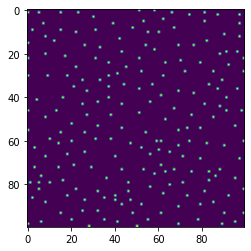

In [144]:
import matplotlib.pyplot as plt
plt.imshow(find_low_points(height_map))

In [145]:
np.sum(height_map[find_low_points(height_map)]) + np.sum(find_low_points(height_map))


444

In [146]:
from collections import defaultdict

In [151]:
def find_bassin(height_map, low_point):
    points = [low_point]
    i, j = low_point
    val = height_map[low_point]
    if i - 1 >= 0:
        if val < height_map[i-1, j] < 9:
            points.extend(find_bassin(height_map, (i-1, j)))
    if i + 1 < height_map.shape[0]:
        if val < height_map[i+1, j] < 9:
            points.extend(find_bassin(height_map, (i+1, j)))
    if j - 1 >= 0:
        if val < height_map[i, j-1] < 9:
            points.extend(find_bassin(height_map, (i, j-1)))
    if j + 1 < height_map.shape[1]:
        if val < height_map[i, j+1] < 9:
            points.extend(find_bassin(height_map, (i, j+1)))
    return points




In [148]:
low_points = list(map(tuple, np.argwhere(find_low_points(height_map))))

In [149]:
list(set(find_bassin(height_map, low_points[1])))

(0, 58)
(1, 58)
(2, 58)
(1, 57)
(0, 57)
(0, 56)
(0, 57)
(0, 56)
(0, 59)
(1, 59)
(1, 58)
(2, 58)
(1, 57)
(0, 57)
(0, 56)


[(1, 57), (0, 58), (1, 59), (2, 58), (0, 57), (1, 58), (0, 59), (0, 56)]

In [152]:
scores = [0, 0, 0]
for low_point in low_points:
    score = len(set(find_bassin(height_map, low_point)))
    if score > scores[0]:
        scores[0] = score
        scores.sort()

print(scores[0] * scores[1] * scores[2])

1168440
